In [1]:
import numpy as np
import pandas as pd

In [3]:
movies_df = pd.read_csv("tmdb_5000_movies.csv")
credits_df = pd.read_csv("tmdb_5000_credits.csv")

In [5]:
movies_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [6]:
credits_df.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [7]:
movies_df.shape


(4803, 20)

In [8]:
credits_df.shape

(4803, 4)

In [10]:
credits_df = credits_df.rename(columns = {"movie_id":"id"})
credits_df.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [11]:
movies_merged = movies_df.merge(credits_df, on = 'id')

In [13]:
movies_merged.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [15]:
movies_cleaned = movies_merged.drop(['status', 'title_y', 'title_x', 'homepage'], axis = 1)

In [17]:
v=movies_cleaned['vote_count']
R=movies_cleaned['vote_average']
C=movies_cleaned['vote_average'].mean()
m=movies_cleaned['vote_count'].quantile(0.70)

In [18]:
movies_cleaned['weighted_average']=((R*v)+ (C*m))/(v+m)

In [21]:
movies_cleaned = movies_cleaned.sort_values('weighted_average', ascending = False)

In [23]:
movies_cleaned.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'vote_average', 'vote_count', 'cast',
       'crew', 'weighted_average'],
      dtype='object')

In [24]:
movies_cleaned[['original_title', 'vote_average', 'vote_count', 'weighted_average']].head(10)

,original_title,vote_average,vote_count,weighted_average
1881,The Shawshank Redemption,8.5,8205,8.340775
3337,The Godfather,8.4,5893,8.192887
662,Fight Club,8.3,9413,8.171648
3232,Pulp Fiction,8.3,8428,8.157615
65,The Dark Knight,8.2,12002,8.102674
809,Forrest Gump,8.2,7927,8.056059
1818,Schindler's List,8.3,4329,8.038748
3865,Whiplash,8.3,4254,8.034695
96,Inception,8.1,13752,8.018611
1990,The Empire Strikes Back,8.2,5879,8.010426


Text(0, 0.5, 'Movie Title')

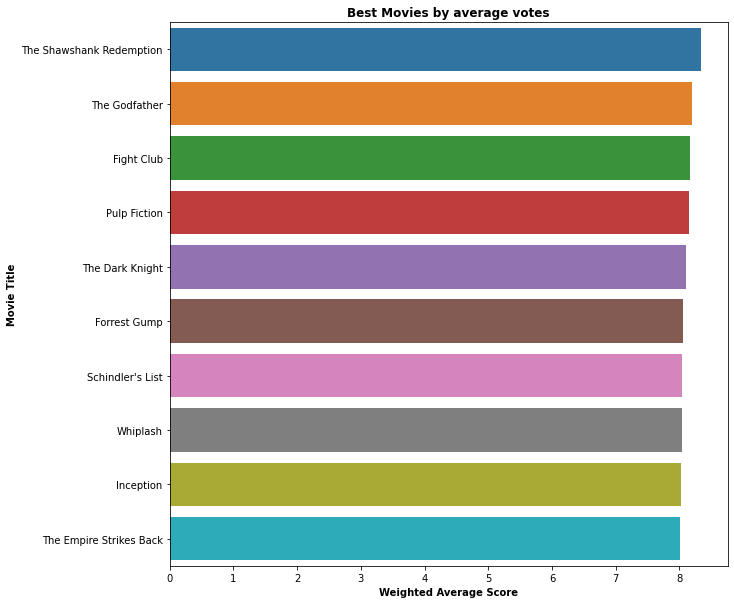

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.barplot(x=movies_cleaned['weighted_average'].head(10),y = movies_cleaned['original_title'].head(10), data=movies_cleaned)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

In [36]:
movies_cleaned.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'vote_average', 'vote_count', 'cast',
       'crew', 'weighted_average'],
      dtype='object')

In [37]:
popularity = movies_cleaned.sort_values('popularity', ascending = False)

<AxesSubplot:xlabel='popularity', ylabel='original_title'>

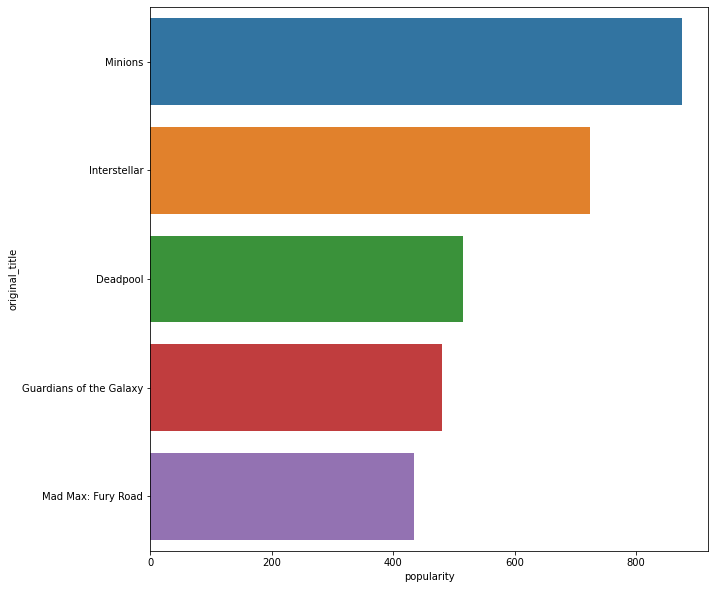

In [41]:
plt.figure(figsize = (10,10))
sns.barplot(x = popularity['popularity'].head(5), y = popularity['original_title'].head(5), data = popularity)


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies_cleaned[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,1.000000,0.156179
1,0.959622,0.164074
2,0.953823,0.167611
3,0.949991,0.138723
4,0.934991,0.213941


In [50]:
movies_cleaned[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [51]:
movies_cleaned['score'] = movies_cleaned['normalized_weight_average']*0.5 + movies_cleaned['normalized_popularity']*0.5

In [53]:
movies_scored_df = movies_cleaned.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
11,Quantum of Solace,0.906439,0.827162,0.866801
1071,Blended,0.460630,1.000000,0.730315
29,Skyfall,0.851874,0.549462,0.700668
135,The Wolfman,0.725217,0.587690,0.656453
210,Batman & Robin,0.670973,0.495989,0.583481
0,Avatar,1.000000,0.156179,0.578090
4,John Carter,0.934991,0.213941,0.574466
7,Avengers: Age of Ultron,0.916431,0.219887,0.568159
1,Pirates of the Caribbean: At World's End,0.959622,0.164074,0.561848
2,Spectre,0.953823,0.167611,0.560717


<AxesSubplot:xlabel='score', ylabel='original_title'>

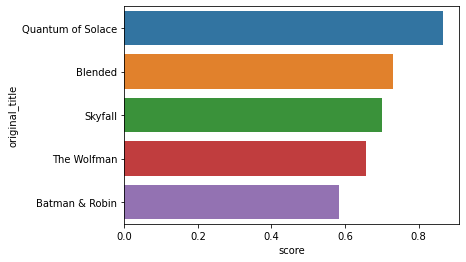

In [55]:
sns.barplot(x = movies_scored_df['score'].head(5), y = movies_scored_df['original_title'].head(5), data = movies_scored_df)